<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-data" data-toc-modified-id="The-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The data</a></span><ul class="toc-item"><li><span><a href="#Train-/-Test-Split-(stratified)" data-toc-modified-id="Train-/-Test-Split-(stratified)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train / Test Split (stratified)</a></span></li></ul></li><li><span><a href="#K-nearest-Neighbors" data-toc-modified-id="K-nearest-Neighbors-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>K-nearest Neighbors</a></span><ul class="toc-item"><li><span><a href="#Cross-validation-for-k" data-toc-modified-id="Cross-validation-for-k-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Cross validation for k</a></span></li></ul></li><li><span><a href="#Classification/Decision-Trees" data-toc-modified-id="Classification/Decision-Trees-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Classification/Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Tree-pruning-/-Cross-Validation" data-toc-modified-id="Tree-pruning-/-Cross-Validation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tree pruning / Cross Validation</a></span><ul class="toc-item"><li><span><a href="#Picking-optimal-tuning-parameters" data-toc-modified-id="Picking-optimal-tuning-parameters-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Picking optimal tuning parameters</a></span></li></ul></li><li><span><a href="#Tree-Interpretation" data-toc-modified-id="Tree-Interpretation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tree Interpretation</a></span></li></ul></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Tuning-parameters" data-toc-modified-id="Tuning-parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Tuning parameters</a></span></li><li><span><a href="#Attributes-/-Interpretation" data-toc-modified-id="Attributes-/-Interpretation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Attributes / Interpretation</a></span><ul class="toc-item"><li><span><a href="#Predictions-/-Predicted-Probabilities" data-toc-modified-id="Predictions-/-Predicted-Probabilities-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Predictions / Predicted Probabilities</a></span></li></ul></li></ul></li><li><span><a href="#Naive-Bayes" data-toc-modified-id="Naive-Bayes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Naive Bayes</a></span><ul class="toc-item"><li><span><a href="#Using-sklearn" data-toc-modified-id="Using-sklearn-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Using sklearn</a></span></li><li><span><a href="#By-Hand" data-toc-modified-id="By-Hand-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>By Hand</a></span></li><li><span><a href="#&quot;Not-so-naive&quot;-Bayes-Classifier" data-toc-modified-id="&quot;Not-so-naive&quot;-Bayes-Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>"Not so naive" Bayes Classifier</a></span></li></ul></li><li><span><a href="#Neural-Networks" data-toc-modified-id="Neural-Networks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Optimal-number-of-nodes-/-layers" data-toc-modified-id="Optimal-number-of-nodes-/-layers-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Optimal number of nodes / layers</a></span></li><li><span><a href="#Fitting-a-Neural-Network" data-toc-modified-id="Fitting-a-Neural-Network-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fitting a Neural Network</a></span></li></ul></li><li><span><a href="#Multiclass-Support-Vector-Machines" data-toc-modified-id="Multiclass-Support-Vector-Machines-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Multiclass Support Vector Machines</a></span></li><li><span><a href="#Model-Ensembling" data-toc-modified-id="Model-Ensembling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model Ensembling</a></span></li><li><span><a href="#Comparison-Across-Methods" data-toc-modified-id="Comparison-Across-Methods-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Comparison Across Methods</a></span></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Discussion</a></span></li></ul></div>

# Machine Learning Multi-Class Classification
We will perform the following Machine Learning algorithims for a multi-class classification problem:
- k-Nearest Neighbors
- Trees
- Random Forest (multiple trees)
- Naive Bayes
- Neural Networks
- SVMs
- Model Ensembling

Most of these algorithims are found in the **`sklearn`** library with the exception of neural networks, which are in the **`keras`** library. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# knn
from sklearn.neighbors import KNeighborsClassifier

# Trees
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz, pydotplus 

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from scipy.stats import multivariate_normal as mvn

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense

# Support Vector Machines
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

Using TensorFlow backend.


## The data
The dataset contains 16 various features of 19999 symbols that correspond to one of the 26 letters of the alphabet.

In [2]:
letters = pd.read_csv('letter-recognition.txt')
print(round(letters.describe().iloc[:,:5],2)) # Summary Statistics
print(letters.dtypes) # Objects are fine for factors
letters.head() # Raw data. First 5 rows.

           xbox      ybox     width      high       pix
count  19999.00  19999.00  19999.00  19999.00  19999.00
mean       4.02      7.04      5.12      5.37      3.51
std        1.91      3.30      2.01      2.26      2.19
min        0.00      0.00      0.00      0.00      0.00
25%        3.00      5.00      4.00      4.00      2.00
50%        4.00      7.00      5.00      6.00      3.00
75%        5.00      9.00      6.00      7.00      5.00
max       15.00     15.00     15.00     15.00     15.00
letter    object
xbox       int64
ybox       int64
width      int64
high       int64
pix        int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xege       int64
xegevy     int64
yege       int64
yegvx      int64
dtype: object


,letter,xbox,ybox,width,high,pix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xege,xegevy,yege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


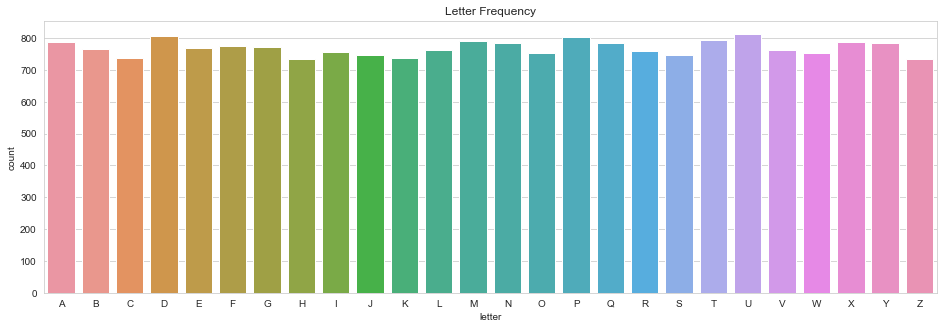

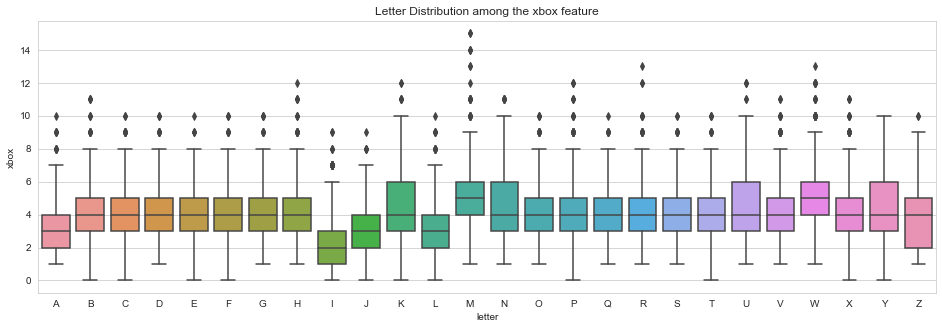

In [3]:
AZ = list(string.ascii_uppercase) # List of captial letters
sns.set_style("whitegrid")
plt.figure(figsize=(16,5))

sns.countplot(x='letter', data=letters, order=AZ)
plt.title('Letter Frequency')
plt.show()

plt.figure(figsize=(16.08,5))
var_toplot = 'xbox'
sns.boxplot(x='letter', y=var_toplot, data=letters, order=AZ)
plt.title('Letter Distribution among the {} feature'.format(var_toplot))
plt.show()

# Fairly even split of letters. Some variability in features. Discrete feature counts. Use accuracy as main metric

### Train / Test Split (stratified)
I used a stratified split, which assigns equal proportions of each letter to the train/test sets. That is, the proportion of A's in the trianing set matches the proporiton of A's in the testing set. The reason I did this was so we would maintain an equal distribution of classes in the training and test sets, thus eliminating the variability in model performance metrics that come from the class distribution of the train/test split. Also, since we have farily balanced classes, accuracy is a good metric of model performance. 

In [4]:
X = preprocessing.scale(letters.iloc[:,1:]) # Center and scale explanitory variables
Y = letters.letter
trainX, testX, trainY, testY = train_test_split(X,Y, train_size=.8, random_state=1, stratify=letters['letter']) 
train_Y_dummies = pd.get_dummies(trainY)
# np.column_stack([trainY.value_counts()/trainY.shape[0], testY.value_counts()/testY.shape[0]])

## K-nearest Neighbors
Pros:
- Easy to implement and understand
- No data assumptions. Nonparametric nature can capture non-linear and weird patterns

Cons:
- Suffers from skewed class distributions (i.e. unbalanced classes).
- For large N, testing gets very computational because it keeps all the training data and computes a distance to each point.
- Sensitive to irrelevant features and the curse of dimensionality. 


In [193]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform', p=2).fit(trainX, trainY) # p=1 Manhattan, p=2 Euclidian. Try manahobolis?
distances_train, indices_train = knn.kneighbors(trainX) # Distances = Distance metrics of the k-NN and corresponding indices/points.

### Cross validation for k

In [196]:
ks = np.arange(1,10)
accs = []
accs_weight = []
print('Finished', end=' ')
for i in ks:
    fun = KNeighborsClassifier(n_neighbors=i, weights='uniform', p=2)
    fun2 = KNeighborsClassifier(n_neighbors=i, weights='distance', p=2)
    accs.append(cross_val_score(fun, trainX, train_Y_dummies, cv=10, scoring='accuracy').mean()) # For some reason this didn't like strings
    accs_weight.append(cross_val_score(fun2, trainX, train_Y_dummies, cv=10, scoring='accuracy').mean()) # 10 fold CV
    print(i, end=',')

Finished 1.2.3.4.5.6.7.8.9.

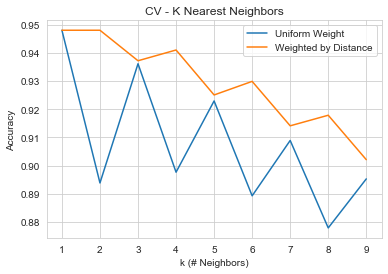

In [197]:
plt.plot(ks, accs, label='Uniform Weight')
plt.plot(ks, accs_weight, label='Weighted by Distance')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('k (# Neighbors)')
plt.title('CV - K Nearest Neighbors')
plt.show()
# k = 1 or 2 weighted knn seems to work best

Note that k=1,2 are identical with weighted distance because when k=2, the closest point gets the most weight and so it will always classify according to the closest point in space. It appears that weighted distance voting does better overall but k=1, which is the same for both weights by distance and uniform weighting, seems to do the best. Thus, we just classify according to the closest neighbor (k=1) and use uniform weight (although distance weighting gives the same thing). When evaluating this on the testing set, we get 94.9% accuracy. I am not completely sure why the CV graph seems to spike between odd/even numbers and have different spike directions for both weighting techniques.

In [181]:
knn_final = KNeighborsClassifier(n_neighbors=1, weights='uniform', p=2).fit(trainX, trainY)
print('Testing set accuracy (k-NN): {}'.format(accuracy_score(knn_final.predict(testX), testY))) # 94.9% test accuracy!
#confusion_matrix(testY, knn.predict(testX)) # To view confusion matrix. Warning: HUGE!

Testing set accuracy (k-NN): 0.949


## Classification/Decision Trees
 Pros:
- Interpretable. Easy to follow and understand
- Little to no data preparation: no scaling required and it can handle multiple classes easily. 
- Robust to outliers and sometimes (min/median) missing value imputation

Cons:
- Severly prone to overfitting. You MUST prune or set the maximum depth of a tree. 
- Trees are very sensitive to new data. i.e. may get a completely different tree using new data.
- Issues with unbalanced classes
- Works better in an ensemble (see random forest)

Classification or decision trees work a lot like the game 21 questions. An example picture is shown below in Figure A from the iris dataset in R. Although they can be used for regression settings, we will use them here for multi-class classification. Trees work by continously finding variables that best split the data. These splits happen at decision nodes, which split the data into 2 subnodes by a logical statement. An example of this split is shown in Figure B. Different information criteria such as the Entropy index or Gini index (defined below) define how good a split is. These criteria are lower for splits that are the most helpful for distingiushing classes. The tree building algorithim will continue building more nodes/branches until a node is completely pure (meaning everything belongs to 1 class) or until certain tree-building constraints are met. The training data is fed through the nodes until they reach a terminal node (sometimes called the leaf node). The leaf node performs the classification by a majority vote. 

<u>Information criterion</u>: The nodes split according to greatest information gain. Information gain is defined as a weighted difference between the impurities of the parent and child nodes. Given classes 1,2,...k, the impurity at node $m$ can be defined using:

**Entropy index** $H(X_m) = -\sum_k p_{mk} \log(p_{mk})$

**Gini index** $H(X_m) = \sum_k p_{mk}(1-p_{mk})$

where $p_{mk}$ is the proportion of datapoints who were classified into class $k$ at node $m$.

<img src="https://miro.medium.com/max/4238/1*7GDzi5knHIqxdU3xys6dvA.png"> 

### Tree pruning / Cross Validation
Classification trees are prone to overfitting, so they must be tuned properly. The `DecisionTreeClassifier` function from **`sklearn`** has several tuning options. In this example we tune:
- *information criteria* for node impurity
- *max_depths* which limits the amount of splits required to classify observations 
- *min_samples_split* which limits the sample size that can be split in a node.

There are other tuning parameters such as: 
- *class_weight* (helpful for imbalanced class sizes)
- *max_leaf_nodes* (which limits the total number of leaf nodes)
- *max_features* (which limits the number of considered features at each split)
- see [this article](https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680) for more info on the tuning parameters.

In [56]:
max_depths = np.arange(5, 25,2)
min_samps_split = [2,3,5,10]
accs_gini = np.ones((len(min_samps_split), len(max_depths)))
accs_entr = np.ones((len(min_samps_split), len(max_depths)))
for si, s in enumerate(min_samps_split):
    for di, d in enumerate(max_depths):
        fun = DecisionTreeClassifier(criterion = 'gini', max_depth = d, min_samples_split=s)
        fun2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = d, min_samples_split=s)
        accs_gini[si, di] = ((1-cross_val_score(fun, trainX, train_Y_dummies, cv=10, scoring='accuracy').mean()))
        accs_entr[si, di] = ((1-cross_val_score(fun2, trainX, train_Y_dummies, cv=10, scoring='accuracy').mean()))
    print('Finished min_samps_split of {}'.format(s))

Finished min_samps_split of 2
Finished min_samps_split of 3
Finished min_samps_split of 5
Finished min_samps_split of 10


In [74]:
gini_min = np.unravel_index(accs_gini.argmin(), accs_gini.shape) #which.min() matrix
entr_min = np.unravel_index(accs_entr.argmin(), accs_entr.shape)
print('Minimum CV error ({}) found using Gini occurs at max_depth = {}, and min_sample_split = {}.'.\
      format(round(np.min(accs_gini),4),max_depths[gini_min[1]],min_samps_split[gini_min[0]]))
print('Minimum CV error ({}) found using Entropy occurs at max_depth = {}, and min_sample_split = {}.'.\
      format(round(np.min(accs_entr),4),max_depths[entr_min[1]],min_samps_split[entr_min[0]]))

Minimum CV error (0.1305) found using Gini occurs at max_depth = 23, and min_sample_split = 2.
Minimum CV error (0.1248) found using Entropy occurs at max_depth = 21, and min_sample_split = 2.


#### Picking optimal tuning parameters
It looks like the Entropy index did better than the Gini index, with a min_sample_split value of 2, and a depth of about 21. Some graphs are shown below that show the cross-validated misclassification rate. Since trees are prone to overfit, I'll choose the optimal tree depth that is just before the misclassification rates level off. It is also possible that after a certain depth, the leaf nodes are already pure and so the added depth won't do anything. I used the entropy criterion with a max_depth of 14 and a min_sample_split value of 2.

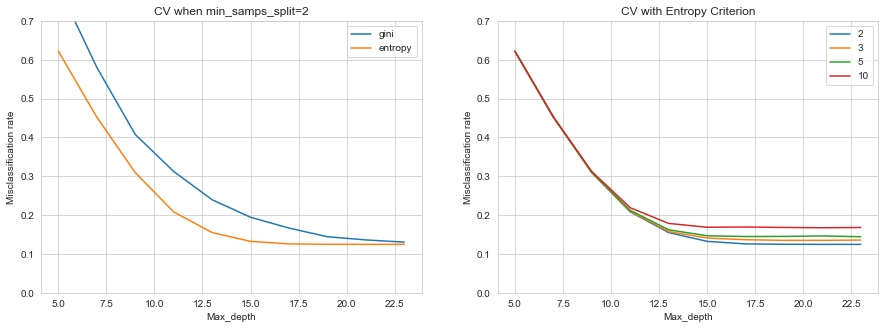

In [90]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(max_depths, accs_gini[0,:], label='gini')
plt.plot(max_depths, accs_entr[0,:], label='entropy')
plt.ylabel('Misclassification rate')
plt.xlabel('Max_depth')
plt.ylim(0, .7)
plt.legend()
plt.title('CV when min_samps_split=2')

plt.subplot(1,2,2)
for i in range(len(min_samps_split)):
    plt.plot(max_depths, accs_entr[i,:], label=min_samps_split[i])
plt.ylabel('Misclassification rate')
plt.xlabel('Max_depth')
plt.legend()
plt.ylim(0, .7)
plt.title('CV with Entropy Criterion with variable min_samps_split')
plt.show()

In [31]:
clf_final = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=2)
clf_final.fit(trainX, trainY)
print('In-Sample accuracy {}'.format(round(clf_final.score(trainX, trainY),4))) # 99% in sample
print('Out-of-Sample accuracy {}'.format(round(clf_final.score(testX, testY),4)))# 87.7% out of sample

In-Sample accuracy 0.982
Out-of-Sample accuracy 0.8722


### Tree Interpretation
Using the **`graphviz`** library, we can visualize the trees based on how they fit the training data. The top variable shows the decision split that the node uses to divide the data into subnodes. As can be seen, the tree seeks to minimize entropy as it chooses splits for nodes. The samples value indicates how much training data gets filtered to that node, and the value vector indicates the frequency of each class in the node. The class='Letter' option indicates the most frequent letter in the node. This would be what the tree would classify all datapoints as if the node were terminal. Also, increasing node color saturation indicates increasing node purity. 

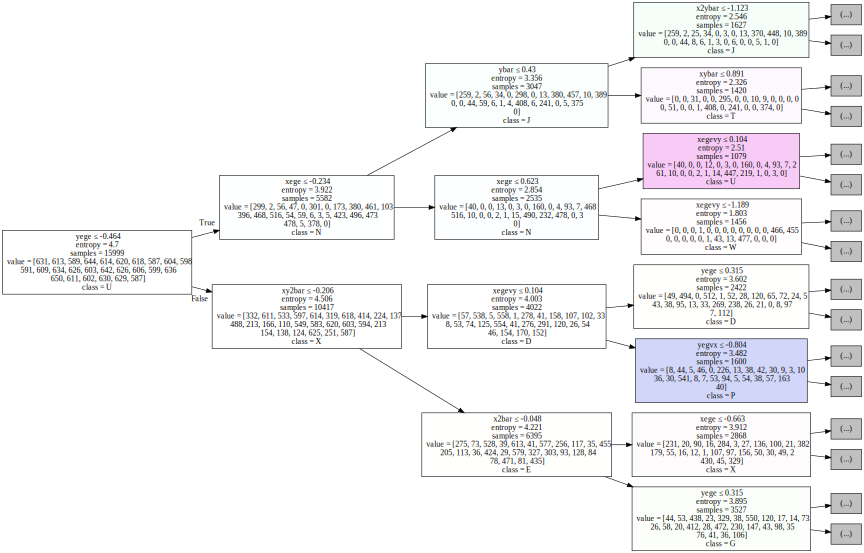

In [102]:
clf_final = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=2).fit(trainX, trainY)
dot_data = export_graphviz(clf_final, out_file=None, 
                     feature_names=letters.columns[1:],  
                     class_names=clf_final.classes_,  
                     filled=True, rounded=False,  
                     special_characters=True, max_depth=3, rotate=True)  
#graph = graphviz.Source(dot_data); graph # HUGE
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.set_size('"12!"')
graphviz.Source(graph.to_string())

We can also view the relative feature importance throughout the tree. This plot shows the (normalized) average Gini/entropy decrease after splitting for each feature. Thus, the more times the feature is used for good splits, the higher its relative importance. A low importance doesn't necessarily mean the variable has no predictive value: it could mean the feature is highly correlated with another feature or that it wasn't used early in the splitting process when entropy drops are high. 

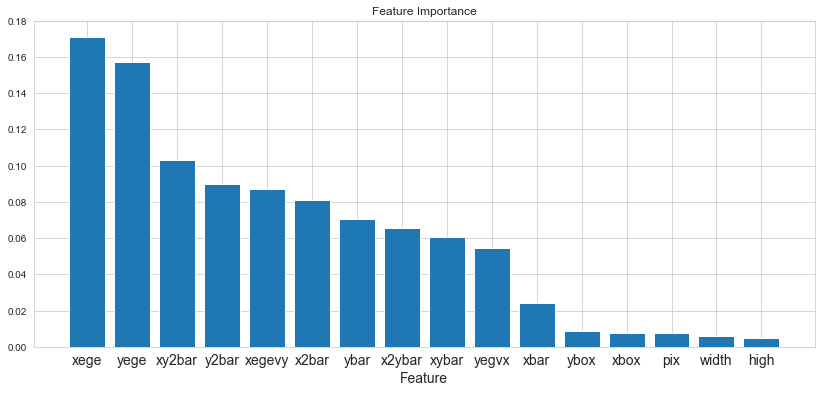

In [106]:
pd.DataFrame(clf_final.predict_proba(testX[:10,:]), columns=AZ) # Proportion of predicted class in the ending leaf
imps = pd.DataFrame({ 'Importance': np.round(clf_final.feature_importances_,4 )}, index=letters.columns[1:]).\
    sort_values('Importance',ascending=False)
plt.figure(figsize=(14,6))
plt.bar(imps.index, imps.Importance)
plt.title('Feature Importance')
plt.xlabel('Feature',fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0,.18)
plt.show()

## Random Forest
Random forests are basically just a collection of decision trees that work together to make a prediction (that's why it's called a forest!). Trees are prone to have a high variance, i.e. the learned parameters can drastically change with new training data. Although we can prune the tree, this can introduce bias as we are biasing the model towards various model constraints. A core idea in statistical learning is the <u>variance-bias tradeoff</u>, which is about finding a model that's flexible enough to fit the training data well, but not too flexible such that it memorizes the training data and overfits. By using the <u>bagging</u> technique with decision trees, we can both reduce the variance and maintain low bias.


Random forests are called random because they 1) randomly sample training points (drawn w/ replacement) to build trees and 2) randomly select a subset of features to consider while building a tree. Random forests simplify to bagging if we consider all the features (instead of a random subset) at each tree. Selecting a smaller number of predictors in a way "decorrelates" the trees, meaning each tree can model a different aspect of the data. Although each individual tree can have a high variance, by averaging across many trees we reduce the overall variance (if $V(x) = \sigma^2, V(\bar{x}) = \sigma^2/n)$ without trading away bias. 


### Tuning parameters
Generally a good value for the number of features to subset is sqrt(# Features). The total number of trees can also be tuned, along with all the parameters of the decision tree algorithim mentioned previously. Although we use the `gridSearchCV` function, sometimes it may be helpful to use the `RandomizedSearchCV` function to randomly search combinations of variables since random forests take longer to fit and have many tuning parameters. For simplicity, we only tune 3 parameters, using the entropy index (since it did better with the decision trees). Code is left in comments for a randomized search and a search with more tuning parameters. 

In [163]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 200, num = 8)]
# Number of features to consider at every split
max_features = np.arange(2, 7,1)
# Maximum number of levels in tree
max_depth = [12,14,16,18,20,None]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 3, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Maximum number of leaf nodes
# max_leaf_nodes = [None,1000,1500]

grid = {'n_estimators': n_estimators
               ,'max_features': max_features
               ,'max_depth': max_depth}
               #,'min_samples_split': min_samples_split,
               #,'min_samples_leaf': min_samples_leaf,
               #,'max_leaf_nodes': max_leaf_nodes}

# Grid search using 3 fold cross validation, 
rf =  RandomForestClassifier(bootstrap = True, criterion='entropy')
rf_CV = GridSearchCV(estimator = rf, param_grid = grid, cv = 3, n_jobs = -1, verbose = 2) # Grid search
# rf_CV = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 160, cv = 3, verbose=2, random_state=1, n_jobs = -1) # Random search
rf_CV.fit(trainX, trainY)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  6.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
  

Now we need to verify that the optimal grid searched model actually does better than the base model. It turns out that even after all this work of tuning the model, it doesn't do much better than the default model. We could search over other parameter values, but it's possible that we have reached the limits on how well the random forest can predict. However, the random forest performs a lot better on the testing set than a single decision tree. The best parameters in the CV search are listed by the `.best_params_` attribute.

In [33]:
base_model = RandomForestClassifier(n_estimators = 100,  criterion='entropy')
print('Test Accuracy for base model {}'.format(base_model.fit(trainX, trainY).score(testX, testY)))

rf_final_model = rf_CV.best_estimator_
rf_final_model = RandomForestClassifier(n_estimators = 200,  random_state=2, criterion='entropy', max_features=3, max_depth=16).fit(trainX, trainY)
print('Test Accuracy for CV grid-search model {}'.format(rf_final_model.score(testX, testY)))

rf_CV.best_params_ # Best parameters

Test Accuracy for base model 0.95425
Test Accuracy for CV grid-search model 0.96175


One nice thing about the `gridSearchCV` function is that it saves many results (like computation time and accuracy). Below are the top 5 best performing models in the grid search. 

In [166]:
cv_rf_results = pd.DataFrame(rf_CV.cv_results_)
cv_rf_results.sort_values('mean_test_score', ascending=False).head(5) # Top 5 models

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
95,4.475031,0.121092,0.458108,0.004485,16,3,200,"{'max_depth': 16, 'max_features': 3, 'n_estima...",0.951997,0.956497,0.957810,0.955435,0.002489,1
94,4.017920,0.039981,0.429518,0.012005,16,3,182,"{'max_depth': 16, 'max_features': 3, 'n_estima...",0.951809,0.954435,0.958185,0.954810,0.002616,2
214,4.641917,0.031012,0.469411,0.034359,None,3,182,"{'max_depth': None, 'max_features': 3, 'n_esti...",0.949559,0.954435,0.959497,0.954497,0.004057,3
215,4.811798,0.119614,0.512297,0.010502,None,3,200,"{'max_depth': None, 'max_features': 3, 'n_esti...",0.950872,0.954997,0.957622,0.954497,0.002778,3
167,4.491320,0.037648,0.557841,0.033677,20,2,200,"{'max_depth': 20, 'max_features': 2, 'n_estima...",0.949747,0.955935,0.957622,0.954435,0.003386,5


Although it's tricky to view multi-dimensional tuning parameter results, we can marginalize by taking the average of each tuning parameter value in the grid search. The top graphs represent accuracies and bottom graphs show computation time. As can be seen, more trees seem to be helpful, max_deph seems to cap out at 16, and 3 features seems to overall the best. 

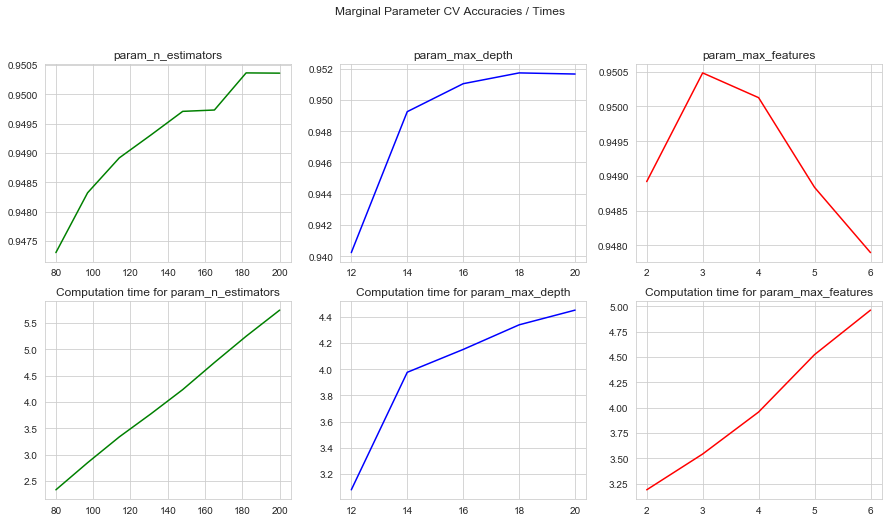

In [167]:
params = ['param_n_estimators', 'param_max_depth','param_max_features']
cv_scores = [cv_rf_results.groupby(x).mean()['mean_test_score'] for x in params]
cv_rf_results['mean_tot_time'] = cv_rf_results['mean_fit_time'] + cv_rf_results['mean_score_time']
time =  [cv_rf_results.groupby(x).mean()['mean_tot_time'] for x in params]

plt.figure(figsize=(15,8))
cols = ['green','blue', 'red']
for i in range(len(cv_scores)*2):
    plt.subplot(2,3,i+1)
    if(i <3):
        plt.plot(cv_scores[i%3], color=cols[i%3])
        plt.title(params[i%3])
    else:
        plt.plot(time[i%3], color=cols[i%3])
        plt.title('Computation time for {}'.format(params[i%3]))
plt.suptitle('Marginal Parameter CV Accuracies / Times')
plt.show()

### Attributes / Interpretation

We can see different attributes in the forest (like the average number of nodes per tree) and view the relative feature importances. The feature importances tell us which features tend to purify the splits across all trees in the forest. These look very similar to the feature importances generated in a single decision tree, but they appear more balanced because a random subset is chosen for each tree. 

In [168]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_: # Trees in the forest are stored here
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Total Number of trees {len(rf_final_model)}')
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {round(np.mean(max_depths),1)}')

Total Number of trees 200
Average number of nodes 4597
Average maximum depth 18.0


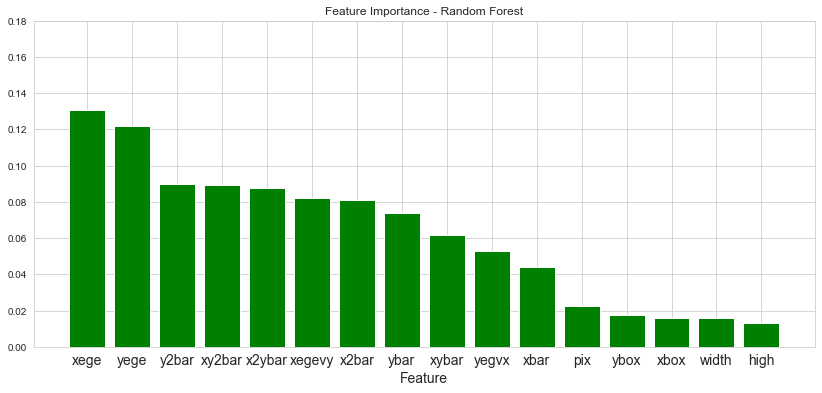

In [199]:
# Feature Importances
rf_imps = pd.DataFrame(data={'Importance': rf_final_model.feature_importances_}, index=letters.columns[1:]).\
                    sort_values('Importance', ascending = False)
plt.figure(figsize=(14,6))
plt.bar(rf_imps.index, rf_imps.Importance, color='green')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Feature',fontsize=14)
plt.xticks(fontsize=14)
plt.ylim(0,.18)
plt.show()

#### Predictions / Predicted Probabilities
The random forest generates a final class prediction by taking the majority vote of all trees in the forest. It can also generate estimated probabilities of belonging to each class by counting the proportion of trees in the forest that classify an observation to a specific class. 

In [192]:
pred_class = rf_final_model.predict(trainX) # Predicted Class
pred_prob = rf_final_model.predict_proba(trainX) # Probabilities
res = pd.DataFrame(np.round(pred_prob,4), columns=AZ)
res['Pred_Class'] = pred_class
res

,A,B,C,D,E,F,G,H,I,J,...,R,S,T,U,V,W,X,Y,Z,Pred_Class
0,0.0000,0.0046,0.0000,0.0000,0.0000,0.0000,0.0005,0.0050,0.0000,0.0000,...,0.0027,0.0000,0.0000,0.0007,0.0177,0.0498,0.0000,0.0003,0.0000,M
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,L
2,0.0000,0.0000,0.0009,0.0000,0.0112,0.0000,0.9774,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0050,0.0000,0.0000,G
3,0.0050,0.0053,0.0088,0.0000,0.0080,0.0000,0.0131,0.0160,0.0000,0.0000,...,0.0000,0.0000,0.0153,0.8020,0.0000,0.0153,0.0000,0.0000,0.0000,U
4,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0.0015,0.0000,0.0000,0.0036,0.0000,0.0000,0.0052,0.0186,0.0000,0.0000,...,0.0002,0.0002,0.0001,0.0018,0.0000,0.0000,0.0018,0.0000,0.0003,O
15995,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,L
15996,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,N
15997,0.0065,0.0000,0.0397,0.0067,0.0111,0.0008,0.0093,0.0105,0.0056,0.0018,...,0.0281,0.0034,0.7471,0.0475,0.0008,0.0127,0.0097,0.0014,0.0000,T


## Naive Bayes

Pros
- Fast and interpretable. Easily generalized for many classes. None/very few tuning parameters
- Works great for covariates that are relatively independent
- Works great for well-sepearated classes (or high-dimensional problems)

Cons
- Naive assumption may be oversimplistic in practice.
- This is typically used just as a baseline model; usually more complex models perform better.  
- Can get tricky with a mix of categorical/numeric variables. It requires either data cleaning (discretizing/assigning numerical values) or a by-hand implementation. 

The Naive Bayes classifier is a simple probabilistic model that uses Bayes Theorem to predict probabilities of belonging to each class. Traditionally, it works under the "naive" assumption that the covariates/features are independent (given the observed class) to simplify math. For example, suppose we have features $x_1, x_2, ... x_p$ for a new observation given a class variable $y_c$ for $c=1,2,...k$ where k is the total number of classes. Let $P(y_c)$ indicate the prior probability of belonging to class $c$. Then the posterior probability of belonging to class $c$ is,

$$  P(y_c|x_1,x_2,...,x_p) = \frac{P(y_c)P(x_1,x_2,...,x_p|y_c)}{P(x_1,x_2,...,x_p)} \propto P(y_c)P(x_1,x_2,...,x_p|y_c) \rightarrow \text{(Assume Conditional Independence)} \approx P(y_c)\prod_{i=1}^{k} P(x_i|y_c) \$$

The predicted class is the $y_c$ such that the above quantity is maximized. This is also called the MAP (Maximimum A Posteriori) estimate. 


### Using sklearn
We must have a way to quantify $P(x_1,x_2,...,x_p|y_c)$ or $\prod_{i=1}^{k} P(x_i|y_c) $. We can do this by assuming some sort of probabilistic model (such as a multivariate normal) or by some kind of proportion matching (usually done with categorical covariates). The conditional independence assumption allows us to estimate each feature as a univariate distribution. In cases where we have both categorical and continuous covariates, we can treat the covariate distribution separately for each variable. We will assume the distribution of covariates is multivariate normal for each class. Thus, each class gets its own mean vector and sigma matrix for all the covariates (so it will be 16 dimensional). We can estimate the mean vector and covariance matrix directly from the covariates. However, the **`sklearn`** library makes the naive assumption that the covariates are conditionally independent, so the off-diagonals in the sigma matrix will be set to 0. We find the class that maximizes the posterior probability. 

In this example, we will just use the relative proportions of letters in the training set as prior probabilities. The priors can act as a good tool to help us to account for cases of imbalanced classes. Since we have continuous covariates, we will use the `GaussianNB()` classifier. There are other Naive Bayes classifiers such as `CategoricalNB()` that can be used for factor variables.  

In [34]:
nb = GaussianNB() # Can add prior arguments for imbalanced classes, otherwise it matches training set frequencies. 
nb.fit(trainX, trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

Here are various methods of the classifier and how to obtain them by hand.

In [35]:
train_df = pd.DataFrame(trainX, index=trainY.index)
train_df['Letter'] = trainY

prior_prob = train_df['Letter'].value_counts().sort_index()/train_df.shape[0] # Training set proportions
nb.class_prior_

mean_vecs = np.array(train_df.groupby('Letter').mean()) # Mean of each feature per letter
nb.theta_ # mean of features per letter

# Univariate variance of each feature = diagonal sigma matrix
sigma_vecs = np.array(train_df.groupby('Letter').var(ddof=0))  # NB Classifier uses MLE (not unbiased) estimate for the variance. 
nb.sigma_  # 'Naively" assumes independence between features. 26 letters - 16 variances
print()
# nb.predict(testX) # To generate class predictions using the classifier

### By Hand

The Naive Bayes classifier isn't actually too complicated and can reasonably be done by hand. The defined function `nb_mvn_probs()` takes a numpy array of new data and a list of mean vectors and covariance matrices for each class (these must be in the exact same class order). It returns the predicted probabilities in each class from the new data by finding the letter with the highest predicted probability. Note that our test set accuracy isn't that great (only 64\%).

In [36]:
sigma_matr = np.array([np.diag(x) for x in sigma_vecs]) # Array of matrices

# Predict probabilities with given mean vectors and covariance matrices for each class. Only takes 1 datapoint at a time. Takes numpy arrays!
# Classes are in the same order as they are listed in mu_vecs and sigma_matr
def nb_mvn_probs(data_set, mu_vecs, sigma_matr, prior_prob=prior_prob):
    nclass = len(AZ)
    results = np.zeros((data_set.shape[0], nclass))
    for i, row in enumerate(data_set):
        letter_probs = np.array([mvn.pdf(row, mu_vecs[j], sigma_matr[j]) for j in range(nclass)])*prior_prob # Unnormalized Probabilities for each letter
        PX = sum(letter_probs) # Denominator Bayes theorem
        results[i] = letter_probs/PX # Predicted probs for 1 observation
    return(results)
# Test set probabilities
probs = pd.DataFrame(nb_mvn_probs(testX, mean_vecs, sigma_matr), index=testY.index, columns=AZ) # Predicted probabilities
preds = [probs.iloc[x,:].idxmax() for x in range(probs.shape[0])] # Predicitons (higheset probability)
# np.mean(nb.predict(testX) == preds) # These values match the sklearn naive bayes model
print('Test set Accuracy (Independence): {}'.format(np.mean(preds == testY.values)))

Test set Accuracy (Independence): 0.64025


### "Not so naive" Bayes Classifier

Recall that one of the assumptions we made is that the covariates are conditionally independent within classes. Sometimes this assumption does not work well with the data. One reason the Naive assumption didn't work well in the last example may be because of correlation or dependence between predictors. For example, below we have the correlation between variables within the letter classes A and B. Independent covariates should have a correlation close to 0 within each letter. The correlation present (especially between the first 5 variables) will cause problems in evaluating the probabilistic model. To understand this conceptually, think of each letter getting its own optimal multivariate normal density region in the feature space. Independence assumes a spherical region is probabable, whereas dependence suggests a narrower, eliptical region. If we assume a spherical region instead of an elliptical region, the model probabilities could be very inaccurate. 

One of the nice properties of a multivariate normal distribution is that it can capture dependence in the covariance matrix. Thus, instead of setting the off-diagonals to 0, we can simply use the entire estimated covariance matrix within each letter. Thus, we model the joint distrubution of the covariates all at once! This will not make the naive (independence) assumption and will instead just assume it's reasonable to estimate the covariates with a multivariate normal distribution. By supplying the non-diagonal covariance matrices into the same function used before (`nb_mvn_probs`), we get about a 24\% improvement in testing set accuracy! 

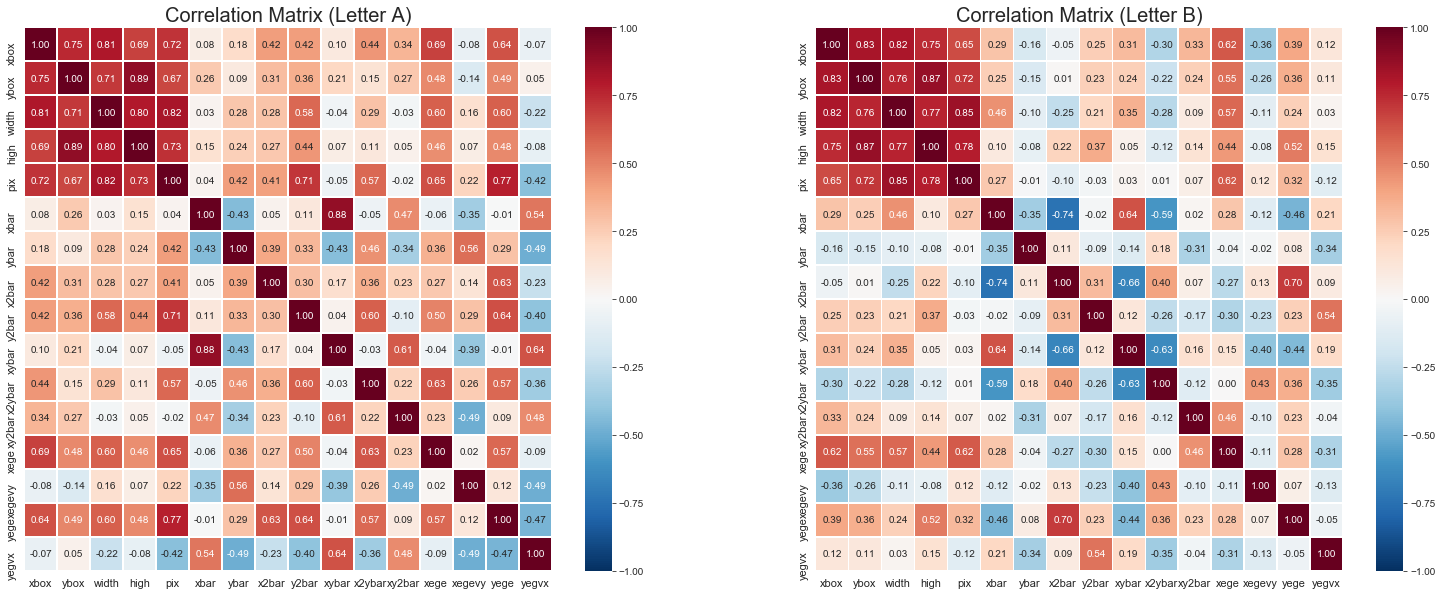

In [156]:
f = plt.figure(figsize=(26,10))
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(trainX[trainY == 'A']).corr(), cmap="RdBu_r", linewidths=.5,annot=True, fmt='.2f', center=0, vmin=-1, 
            xticklabels= letters.columns[1:], yticklabels= letters.columns[1:])
plt.title('Correlation Matrix (Letter A)', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(trainX[trainY == 'B']).corr(), cmap="RdBu_r", linewidths=.5,annot=True, fmt='.2f', center=0, vmin=-1, 
            xticklabels= letters.columns[1:], yticklabels= letters.columns[1:])
plt.title('Correlation Matrix (Letter B)', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [37]:
# "Not so" naive bayes (assume no independence in the covariates). Similar to a Quadratic (not linear) discriminant analysis
sigma_notInd_matrs = train_df.groupby('Letter').apply(lambda x: x.cov()) # Non diagonal covariance matrix for each letter 
sigma_list = [np.array(v) for k, v in sigma_notInd_matrs.groupby('Letter')] # Puts it in a list format
probs_notInd = pd.DataFrame(nb_mvn_probs(testX, mean_vecs, sigma_list), index=testY.index, columns=AZ)
preds_notInd = [probs_notInd.iloc[x,:].idxmax() for x in range(probs_notInd.shape[0])]
print('Test Set Accuracy (no Independence): {}'.format(np.mean(preds_notInd == testY.values))) # Much Better

Test Set Accuracy (no Independence): 0.88875


## Neural Networks
Pros
- Neural networks can learn some of the most complicated and non-linear patterns in datasets. (e.g. Image processing)
- Outperforms nearly every other ML algorithim if there is a large amount of data. 
- Once trained, model runs super quick. 
- Very flexible and can adjust for classification (binary or multiple classes) or regression. 


Cons
- Prone to overfitting. Requires tons of training data and tends to perform poorly with small amounts of data.
- Black box algorithim; interpretability of feature importance is very difficult. 
- Training and tuning can often be very computational and take a long time on most computers. 
- Sometimes difficult to tune properly. 

Neural networks are inspired by our brain's network of neurons to gain insights from data. I will implement neural networks using **`karas`** ([install instructions](https://keras.io/0)), a high-level API that can be written on top of TensorFlow, CNTK, or Theano. Neural networks are known to easially have hundreds of parameters to estimate. We define a loss function using categorical cross-entropy (or multi-class log-loss. More losss functions are listed [here](https://keras.io/losses/)). The features (or covariates) are passed through an input layer. Centering and scaling is important for the optimizer to speed the convergence of the gradient descent (circular contours are easier to navigate). We use the Adam optimizer, which has various tuning parameters such as the learning rate, but other optimizers can be found [here](https://keras.io/optimizers/). 

Fitting the entire training set takes a lot of time for NN. It's often helpful to pass through the data in chunks (of size batch_size) at a time. The model also will not generalize well with a large batch size since the optimazion does get as stuck in sharp gradients. The process of feeding data forward through a neural network is called <u>forward propogation</u>. An <u>epoch</u> is one forward and backward pass of all observations. At each node, a weighted sum is calculated from all nodes in the previous layer and an <u>activation function</u> is applied to it. These allow for the network to learn complex (non-linear) patterns. If no function is applied, neural networks behave like a linear regression model. The best function depends on the dataset and so the activation function is used as a tuning parameter. In terms of computational speed, relu is fastest, so we move to others if we have suboptimal results.


[Activation functions](https://keras.io/activations/) (intuition [here](https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/)): 
- relu (rectified linear units):  $max(x,0)$. Speeds up training convergence.
- sigmoid $\frac{1}{(1+exp(-x))}$
- tanh (scaled / transformed sigmoid) $2*f(2x)-1 \rightarrow \frac{e^x-e^{-x}}{e^x+e^{-x}}$
- softmax (typically only used in the output layer. Transforms all exponentiated inputs to sum to 1)

### Optimal number of nodes / layers
Below I have defined a function `make_NN_mdl` that takes a python tuple of the number of nodes in each layer and creates a neural network model. We can also specify an activation function for the hidden layers. We then test several different node configurations and find optimal tuning parameters using a <u>validation set</u>. A validation set is like a testing set, in that it is held out from the training data, but it is repeatedly tested to tune hyperparameters. After the optimal parameters are found, we then test overall performance on the testing set. Ideally, the model should be evaluated on samples that were not used to build or fine-tune the model, so that they provide an unbiased sense of model effectiveness. 

In [89]:
nclass = len(AZ)
n_inputs = trainX.shape[1]

# Makes a neural network with a supplied tuple of the number of nodes in each layer. Can also specify activation function
# e.g. (10,20) has 2 hidden layers, with 10 nodes in the first layer, and 20 in the second.
def make_NN_mdl(hidden_layers, act_fun='relu'):
    nn_model = Sequential() # Layers added in order and are fed forward.
    nn_model.add(Dense(hidden_layers[0], input_dim=n_inputs, activation=act_fun)) # Dense = fully connected layer. Input_dim = # xs
    for l in hidden_layers[1:]:
        if l == 0: 
            continue
        nn_model.add(Dense(l, activation=act_fun)) 
    nn_model.add(Dense(nclass, activation='softmax')) # Normalizes exp(inputs) to sum to 1 (like a probability)
    nn_model.compile(loss='categorical_crossentropy', # Optimization objective loss function. 
                 optimizer='adam', 
                 metrics=['accuracy']) # Metrics are not used for training the model. They are for the user
    return nn_model

# Possible node configurations to search over
N_nodes = [nclass, nclass+10, n_class+20, n_class+30, n_class+40, n_class+50, n_class+60, n_class+70]
# node_configs = [(round(x),y) for x in N_nodes for y in np.append(0, N_nodes).astype('int32')]
node_configs = [(round(x),0,0) for x in N_nodes]
node_configs.extend([(round(x),round(x),0) for x in N_nodes])
node_configs.extend([(round(x),round(x),round(x)) for x in N_nodes])
node_configs
val_accs = []

for i, k in enumerate(node_configs): # WARNING: Takes a while
    nn_model = make_NN_mdl(k)
    model_hist = nn_model.fit(trainX, train_Y_dummies, epochs=100, batch_size=40, verbose=0, validation_split=.2)
    val_accs.append(model_hist.history['val_accuracy'][-1])
    print('.', end='')
    if(i > 0 and (i+1) % 5==0): print(int(i+1),end='')

.....5.....10.....15.....20....

In [90]:
pd.DataFrame({'Hidden layer Config':node_configs, 'Validation Accuracy': np.round(val_accs,4)})

,Hidden layer Config,Validation Accuracy
0,"(26, 0, 0)",0.8928
1,"(36, 0, 0)",0.9097
2,"(46, 0, 0)",0.9191
3,"(56, 0, 0)",0.9269
4,"(66, 0, 0)",0.9366
5,"(76, 0, 0)",0.9381
6,"(86, 0, 0)",0.9456
7,"(96, 0, 0)",0.9441
8,"(26, 26, 0)",0.9094
9,"(36, 36, 0)",0.9362


### Fitting a Neural Network

Although the (3 hidden layers - 96 nodes each) neural network performed best, adding an additional hidden layer of 96 nodes adds 9,312 parameters! During the gradient descent, there is also a higher variance in the accuracies between epochs in the 3 layer network or in a super high (100+) number of nodes. Because of this, I'll choose (2 hidden layers - 96 nodes each) as the optimal network, which we train using `.fit()`. We can use the testing set as the validation_data so we can see how the model performs over each epoch.  We can also view the neural network structure using the `.summary()`. The number of parameters in a given layer is found by taking the number of nodes in the incoming layer + 1 (for biases/intercepts) and multiplying it by the number of nodes in the forthcoming layer. As can be seen, we have reached a several thousand parameters (13,466) to estimate. While this could be a potential problem with smaller datasets, we have enough (15,000) observations in the training set. 

In [174]:
nn_model = make_NN_mdl((96,96,0))
model_hist = nn_model.fit(trainX, train_Y_dummies, epochs=100, batch_size=40, verbose=2, validation_data = (testX,pd.get_dummies(testY))) 

Train on 15999 samples, validate on 4000 samples
Epoch 1/100
 - 0s - loss: 1.4815 - accuracy: 0.6020 - val_loss: 0.8267 - val_accuracy: 0.7703
Epoch 2/100
 - 0s - loss: 0.6614 - accuracy: 0.8132 - val_loss: 0.5805 - val_accuracy: 0.8347
Epoch 3/100
 - 0s - loss: 0.4874 - accuracy: 0.8605 - val_loss: 0.4625 - val_accuracy: 0.8670
Epoch 4/100
 - 0s - loss: 0.3945 - accuracy: 0.8854 - val_loss: 0.3882 - val_accuracy: 0.8848
Epoch 5/100
 - 0s - loss: 0.3317 - accuracy: 0.9022 - val_loss: 0.3448 - val_accuracy: 0.8917
Epoch 6/100
 - 0s - loss: 0.2888 - accuracy: 0.9124 - val_loss: 0.3095 - val_accuracy: 0.9038
Epoch 7/100
 - 0s - loss: 0.2505 - accuracy: 0.9252 - val_loss: 0.2742 - val_accuracy: 0.9150
Epoch 8/100
 - 0s - loss: 0.2241 - accuracy: 0.9319 - val_loss: 0.2578 - val_accuracy: 0.9218
Epoch 9/100
 - 0s - loss: 0.2011 - accuracy: 0.9377 - val_loss: 0.2339 - val_accuracy: 0.9268
Epoch 10/100
 - 0s - loss: 0.1817 - accuracy: 0.9432 - val_loss: 0.2234 - val_accuracy: 0.9283
Epoch 11/1

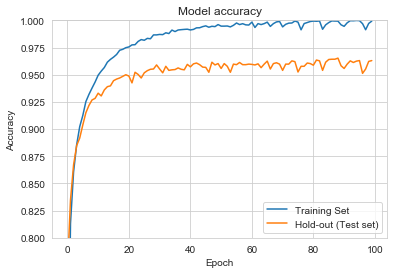

In [175]:
plt.plot(model_hist.history['accuracy'], label='Training Set')
plt.plot(model_hist.history['val_accuracy'], label='Hold-out (Test set)')
plt.title('Model accuracy')
plt.ylim(.8, 1)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


In [99]:
# plot_model(nn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
nn_model.summary()

Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_358 (Dense)            (None, 96)                1632      
_________________________________________________________________
dense_359 (Dense)            (None, 96)                9312      
_________________________________________________________________
dense_360 (Dense)            (None, 26)                2522      
Total params: 13,466
Trainable params: 13,466
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Test set predictions
nn_probs = nn_model.predict(testX)
nn_preds = [AZ[np.argmax(x)] for x in nn_probs]
nn_model.evaluate(testX, pd.get_dummies(testY)) # Evaluation on test set (loss, accuracy) 96.3% accuracy

4000/4000 [==============================] - 0s 18us/step


[0.16831103315003565, 0.9629999995231628]

## Multiclass Support Vector Machines

Recall that Support Vector Machines (SVMs) seek to find the optimal separating hyperplane that best separates two classes. Research is still ongoing on how we can extend this binary classifier to work for multiple classes, but two popular methods out there are One vs One and One vs Rest (or One vs All). We can fit SVMs using the `SVC()` function, which classifies according to the one vs one method. 

**One vs One** (OvO) builds k choose 2 binary classifiers for each possible pair of classes and then classifies according to majority vote. In the case of ties, the first class is used, but a one vs rest can be used if `break_ties=True`. In this example, we will have to build 26 choose 2 = 325 classifiers. Although this sounds like a lot, we actually don't need the full training data to train each classifier; we only need 2/26 of the data to build each one. Python is still able to build all of these relatively quickly, but tuning these by a cross-validated grid search may be computational. 

**One vs Rest** (OvR) builds k binary classifiers (one for each class) and compares all observations of one class to all observations not of that class. The predicted class is just the one with the highest decision value. This is avantageous in that we don't need as many classifiers as One-vs-One and we will likely never run into ties. We can use the `OneVsRestClassifier` as a wrapper function to do One vs Rest classification using the `SVC()` function. 

Both methods perform well in different circumstances and can be generalized to any binary classifier. Using the default hyperparameters both perform really well and they can be tuned by messing with the C (regularization parameter), kernel or gamma parameters. In this example, we find that the One vs One classifier does the best, though it could be tuned for better results. 

In [242]:
# One vs One SVM
svm_ovo = svm.SVC(decision_function_shape='ovo')
svm_ovo.fit(trainX, trainY)

# One vs Rest SVM
svm_ovr = OneVsRestClassifier(svm.SVC(decision_function_shape='ovr'))
svm_ovr.fit(trainX, trainY)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [243]:
svm_ovo.decision_function(testX) # Decision Values for One vs one (note the 325 classifiers)
svm_ovr.decision_function(testX) # Decision values for one vs rest (note the 26 classifiers)
# svm_ovo.predict(testX) # Predictions

print('Test set accuracy (OvO): {}'.format(svm_ovo.score(testX, testY)))
print('Test set accuracy (OvR): {}'.format(svm_ovr.score(testX, testY)))

Test set accuracy (OvO): 0.94125
Test set accuracy (OvR): 0.92725


## Model Ensembling
Similar to how random forests can perform better than individual trees, sometimes using two or more ML algorthims can improve model predictions. <u>Model ensembling</u> is the process of combining multiple methods/algorithims to create a single predictive model for better predictions. Ensemble methods can be divided into 2 groups: *sequential* (base learners are generated sequentially, e.g. boosters) and *parallel* (base learners are generated in parallel, e.g. bagging). Sequential learners exploit dependence by seeking to improve previously mislabeled observations, while parallel learners exploit independence between learners for a lower variance. Random forests are an example of a parallel ensemble method. Generally, a useful ensemble has both diverse and accurate learners (or ML/statistical models), and ensembling is more useful when the learners have a high variance (or are unstable). 

Ensembling can be done by doing some kind of averaging, bagging, boosting, or a combination of these. One drawback to ensembling is that we often lose interpretability of our models. For prediciton based problems, ensemble models work great! Here we just take the majority vote of the top 3 performing models (Neural Network, Random Forest, and k-NN). It ends up doing better than all 3 separately! 


In [177]:
# from sklearn.ensemble import VotingClassifier
preds_df = pd.DataFrame({'nn': nn_preds, 'rf':rf_final_model.predict(testX), 'knn':knn_final.predict(testX)})
preds_ens = [preds_df.iloc[x,:].value_counts().index[0] for x in range(preds_df.shape[0])]
print('Test Set Accuracy {}'.format(np.mean(preds_ens == testY)))

Test Set Accuracy 0.97425


## Comparison Across Methods

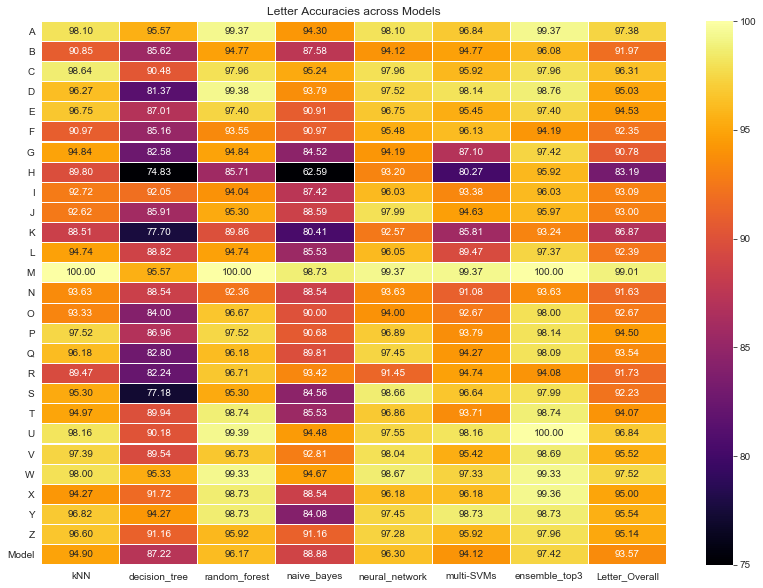

In [247]:
# classification_report(testY, knn_final.predict(testX), target_names=knn_final.classes_,digits=3) # For precision and recall

# Accuracy for each letter (given class)
def get_accs(y_true, y_pred):
    m = confusion_matrix(y_true, y_pred, normalize='true').diagonal() # For some reason this is axis 1. Not sure why
    return np.append(m, np.mean(y_true == y_pred))

preds_all = [knn_final.predict(testX), clf_final.predict(testX), rf_final_model.predict(testX), preds_notInd,
             nn_preds, svm_ovo.predict(testX), preds_ens]
accs = pd.DataFrame({
 'kNN' : get_accs(testY, preds_all[0])
,'decision_tree': get_accs(testY, preds_all[1])
,'random_forest': get_accs(testY, preds_all[2])
,'naive_bayes':get_accs(testY, preds_all[3])
,'neural_network':get_accs(testY, preds_all[4])
,'multi-SVMs':get_accs(testY, preds_all[5])
,'ensemble_top3':get_accs(testY, preds_all[6])
}, index=np.append(AZ, 'Model'))

accs['Letter_Overall'] = accs.mean(axis=1)


plt.figure(figsize=(14,10))
sns.heatmap(accs*100, cmap="inferno", linewidths=.1,annot=True, fmt='.2f', vmin=75, vmax=100, xticklabels= accs.columns, yticklabels= accs.index)
plt.yticks(rotation=0)
plt.title('Letter Accuracies across Models')
plt.show()

In [197]:
def letter_debug(let, method, top=5, verbose=True):
    l = np.where(accs.index == let)[0][0]
    m = np.where(accs.columns == method)[0][0]
    cm = np.round(confusion_matrix(testY, preds_all[m])[l,:],4)
    letter_prop = pd.DataFrame({'#Classified':cm,'Proportion':np.round(cm/sum(cm),4)},index=AZ)
    if verbose:
        print('Of all {} letters in the testing set, the {} method classified the following (proportion):'.format(let, method))
    return letter_prop.sort_values(by='#Classified', ascending=False).iloc[:top,:]

letter_debug('H', 'random_forest', verbose=False) 
letter_debug('H', 'neural_network') # H is being confused with D, K, Y and R ...

Of all H letters in the testing set, the neural_network method classified the following (proportion):


,#Classified,Proportion
H,137,0.9320
R,4,0.0272
K,3,0.0204
D,1,0.0068
X,1,0.0068


## Discussion
It appears that the neural network, random forest and 1-NN approach performed very well (about 95% accuracy). The ensemble classifier that combined these 3 approaches performed the best. The ensemble classifier was even able to perfectly predict U's, even though no individual model was able to do that. The decision trees performed the worst and the non-independent naive bayes classifier was slightly better than worst. Performance was not the same across each letter. Certain letters like M, A, and W were predicted really well across model, whereas letters H and K were predicted relatively well across the classifiers. The letter that was the hardest to distingiush was H, which frequently got confused with D, K, Y, and R in several classifiers. 